In [1]:
from ImageLab import *
import numpy as np
from PIL import Image

Import the images

In [2]:
# CustomGx_img2 = Image.open(
#     'Image/Powerline/Custom_Gx_Complex.png').convert('RGB')
# CustomGx_img2 = np.array(CustomGx_img2)

# CustomGy_img2 = Image.open(
#     'Image/Powerline/Custom_Gy_Complex.png').convert('RGB')
# CustomGy_img2 = np.array(CustomGy_img2)

# sX = Image.open(
#     'Image/Powerline/Custom_Gx_Simple.png').convert('RGB')
# sX = np.array(sX)

# sY = Image.open(
#     'Image/Powerline/Custom_Gy_Simple.png').convert('RGB')
# sY = np.array(sY)


# Panoramic = Image.open(
#     'Image/Panoramic_PowerLine.jpg').convert('RGB')
# Panoramic = np.array(Panoramic)

# Simple = Image.open(
#     'Image/PowerLine_Simple.jpg').convert('RGB')
# Simple = np.array(Simple)



# FingerPrint = Image.open(
#     'Image/Thumb_Print.png').convert('RGB')
# FingerPrint = np.array(FingerPrint)

Gradient Calculation

In [3]:
# CustomGrad = EdgeDetect().gradient_mag(CustomGx_img2, CustomGy_img2)
# CustomGrad = ColorSpace(CustomGrad).rgb_to_grayscale()
# Gradient_Path = ImageUtil(CustomGrad).save_image_to_folder(
#     'Image/Morphology', 'Gradient.png')

In [4]:
# SimpleGrad = EdgeDetect().gradient_mag(sX, sY)
# SimpleGrad = ColorSpace(SimpleGrad).rgb_to_grayscale()
# S_Path = ImageUtil(SimpleGrad).save_image_to_folder(
#     'Image/Morphology', 'SimpleGradient.png')

In [5]:
# ImagePlotter(FingerPrint).plot_image('Thumb')

ErosionKernel = np.full((9,9), 1)

DilationKernel = np.full((35, 35), 1)

FinishingKernel = np.full((27, 27), 1)


# T1, T1_Path = ImageProcessor('Image/Thumb_Print.png').process(Erosion(), ErosionKernel, '9x9T1')
# T2, T2_Path = ImageProcessor(T1_Path).process(
#     Dilation(), DilationKernel, '18x18T2')
# T3, T3_Path = ImageProcessor(T2_Path).process(
#     Erosion(), FinishingKernel, '9x9T3')

Dilation, Erosion, and Morphological Gradient

In [6]:
# Dilation and Erosion

# Kernel = np.full((3,3), 1)

# p1, pP1 = ImageProcessor(
#     'Image/Panoramic_PowerLine.jpg').process(Dilation(), Kernel, 'P1')
# s1, sP1 = ImageProcessor(
#     'Image/PowerLine_Simple.jpg').process(Dilation(), Kernel, 'S1')
# p2, pP2 = ImageProcessor(
#     'Image/Panoramic_PowerLine.jpg').process(Erosion(), Kernel, 'P2')
# s2, sP2 = ImageProcessor(
#     'Image/PowerLine_Simple.jpg').process(Erosion(), Kernel, 'S2')

# diff1 = p1 - p2
# ImagePlotter(diff1).plot_image('Difference')
# diff2 = s1 - s2
# ImagePlotter(diff2).plot_image('Difference')

In [7]:
# T1, T1_Path = ImageProcessor('Image/Thumb_Print.png').process(Erosion(), ErosionKernel, '9x9C1')
# T2, T2_Path = ImageProcessor(T1_Path).process(
#     Dilation(), ErosionKernel, '9x9C2')
# T3, T3_Path = ImageProcessor(T2_Path).process(
#     Dilation(), ErosionKernel, '9x9C3')
# T4, T4_Path = ImageProcessor(T3_Path).process(
#     Erosion(), ErosionKernel, '9x9C4')


Final Major Analysis - Erosion, Dilation, Black Hat, Morphological Edge on Binary and Gray-Level images.

In [8]:
def diamond_kernel(n):
    # Create a grid of coordinates
    x, y = np.meshgrid(np.arange(n+1), np.arange(n+1))
    # Calculate the distance from the center of the grid
    r = np.abs(x - n/2) + np.abs(y - n/2)
    # Create a kernel that is 1 inside the diamond and 0 outside
    kernel = np.zeros((n+1, n+1))
    kernel[r <= n/2] = 1
    return kernel


def circle_kernel(n):
    # Create a grid of coordinates
    x, y = np.meshgrid(np.arange(n+1), np.arange(n+1))
    # Calculate the distance from the center of the grid
    r = np.sqrt((x - n/2)**2 + (y - n/2)**2)
    # Create a kernel that alternates 1's and 0's based on the distance from the center
    kernel = np.zeros((n+1, n+1))
    kernel[r < n/2] = 1
    kernel = kernel.astype(int)
    return kernel

ErosionKernel = circle_kernel(8)

# Fruits = Image.open(
#     'Image/Citrus_fruits.jpg').convert('RGB')
# Fruits = np.array(Fruits)

# Panoramic = Image.open(
#     'Image/Panoramic_PowerLine.jpg').convert('RGB')
# Panoramic = np.array(Panoramic)

# # Calculate Grayscale and Binary

# PanoramicGray = ColorSpace(Panoramic).rgb_to_grayscale()
# PanoramicBinary = Segment('Image/Panoramic_PowerLine.jpg').apply_threshold(100)
# ImagePlotter(PanoramicGray).plot_image('GrayScale')
# ImagePlotter(PanoramicBinary).plot_image('Binary')

# print(type(PanoramicGray))
# print(PanoramicGray.shape)
# print(type(PanoramicBinary))
# print(PanoramicBinary.shape)

# PG_Path = ImageUtil(PanoramicGray).save_image_to_folder(
#     'Image/Project/', 'PanoramicGrey.png')
# PB_Path = ImageUtil(PanoramicBinary).save_image_to_folder(
#     'Image/Project/', 'PanoramicBinary.png')


Calculation of Erosion, Dilation, and Edge Maps on Binary and Grayscale Images.

In [9]:
def basicAnalysis(PB_Path, folder_name, img_name):

    T1, T1_Path = ImageProcessor(PB_Path, folder_name, img_name).process(
        Erosion(), ErosionKernel, '9x9C1')
    T2, T2_Path = ImageProcessor(PB_Path, folder_name, img_name).process(
        Dilation(), ErosionKernel, '9x9C2')

    ImagePlotter(T1).plot_image('Eroded')
    ImagePlotter(T2).plot_image('Dilated')

    T1 = np.squeeze(T1)
    T2 = np.squeeze(T2)
    PanoramicBinary = np.squeeze(PanoramicBinary)

    ImagePlotter(PanoramicBinary - T1).plot_image('Hole Detection')
    ImagePlotter(T2 - T1).plot_image('Morphological Edge')

    T4, T4_Path = ImageProcessor(PB_Path, folder_name, img_name).process(
        Erosion(), ErosionKernel, '9x9C4')

    T4, T4_Path = ImageProcessor(T4_Path, folder_name, img_name).process(
        Dilation(), ErosionKernel, '9x9C4')

    T5, T5_Path = ImageProcessor(PB_Path, folder_name, img_name).process(
        Dilation(), ErosionKernel, '9x9C5')

    ImagePlotter(T4).plot_image('Eroded')
    ImagePlotter(T5).plot_image('Dilated')

    T4 = np.squeeze(T4)
    T5 = np.squeeze(T5)
    PanoramicGray = np.squeeze(PanoramicGray)

    ImagePlotter(PanoramicGray - T4).plot_image('Hole Detection')
    ImagePlotter(T5 - T4).plot_image('Morphological Edge')

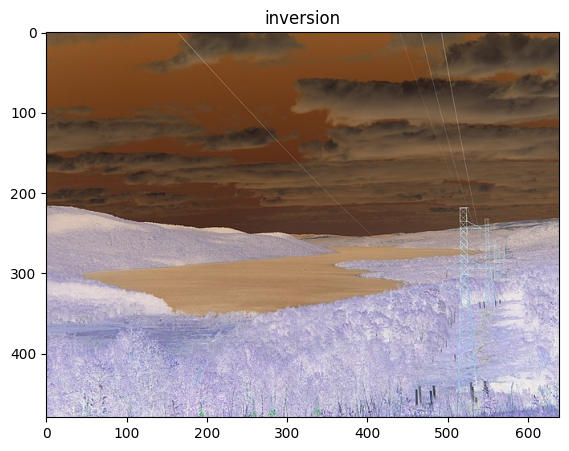

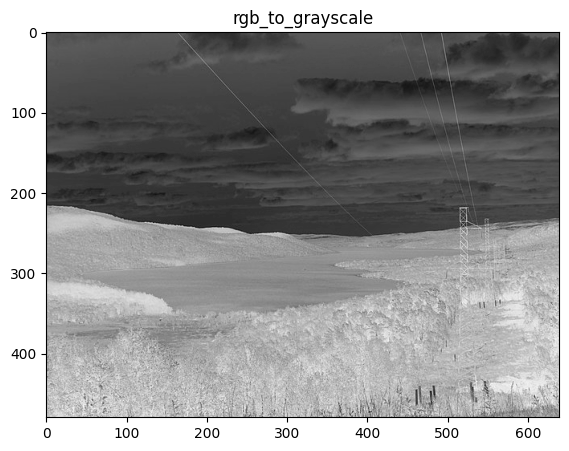

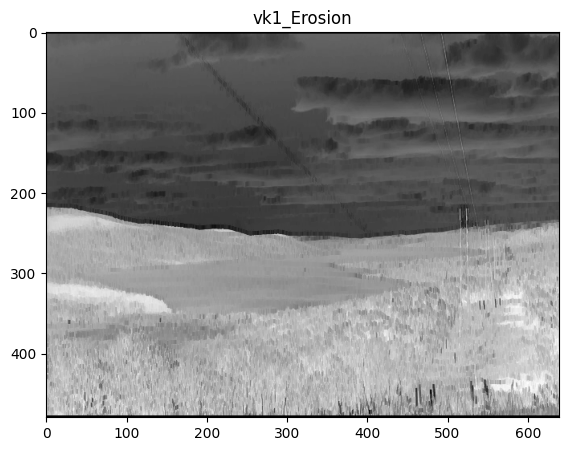

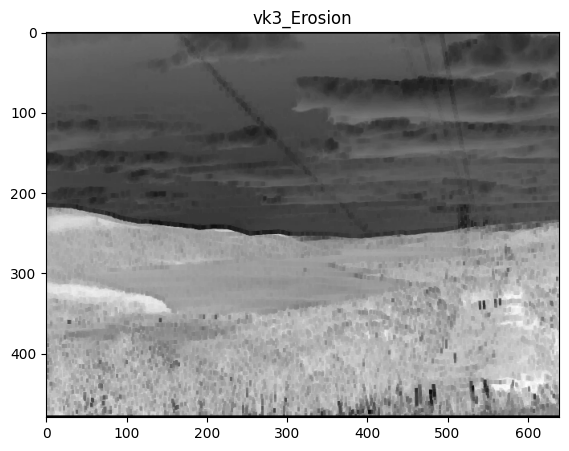

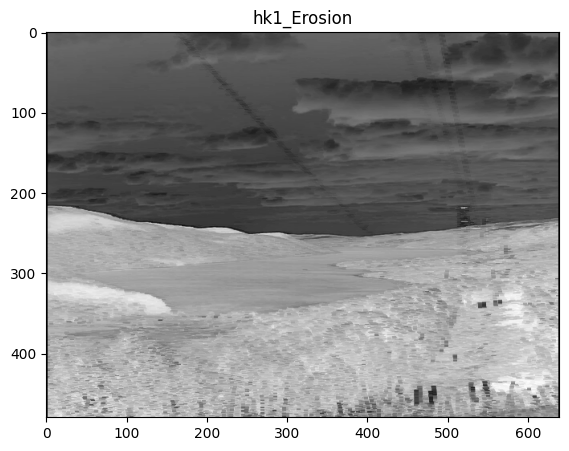

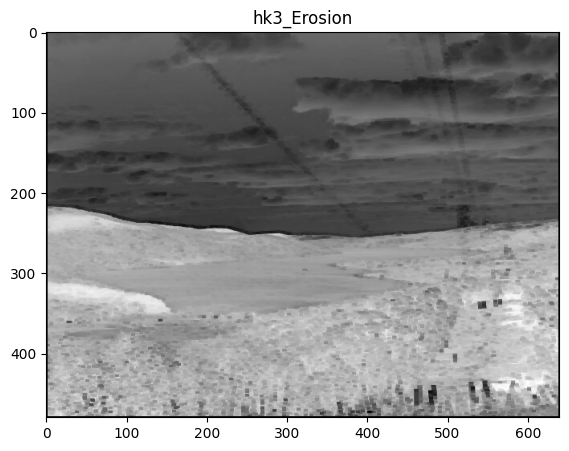

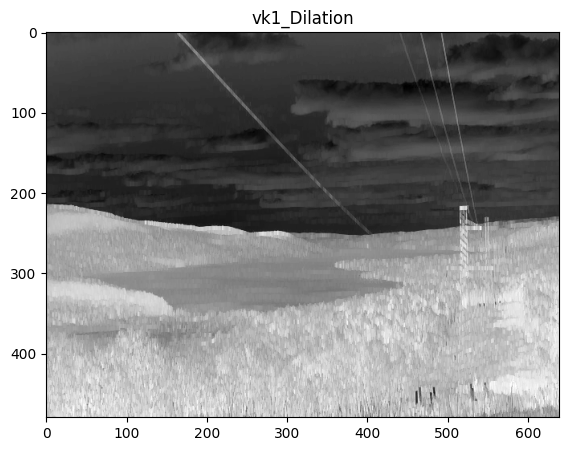

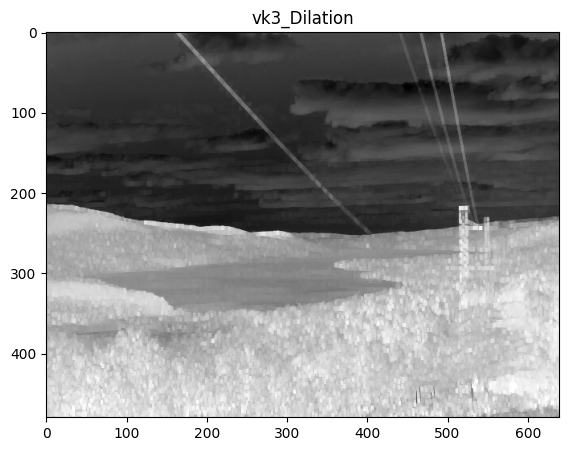

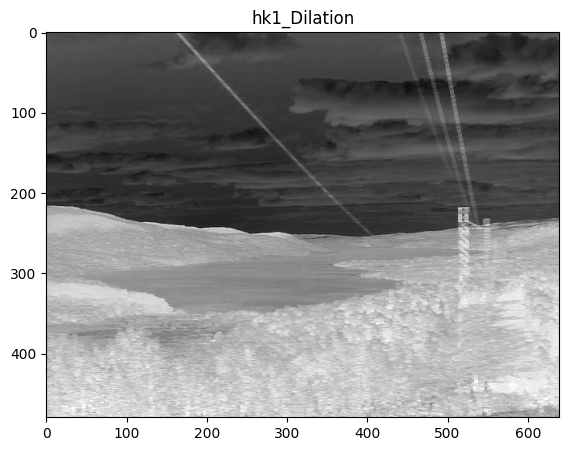

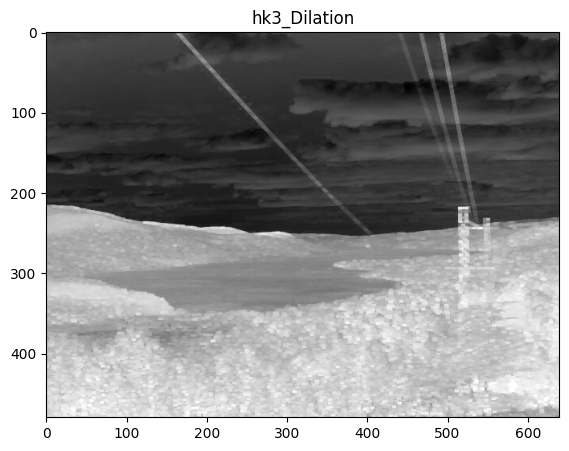

In [12]:

vkernel3 = np.array([[0, 1, 1, 1, 0],
                    [0, 1, 1, 1, 0],
                    [0, 1, 1, 1, 0],
                    [0, 1, 1, 1, 0],
                    [0, 1, 1, 1, 0]])

vkernel1 = np.array([[0, 0, 1, 0, 0],
                    [0, 0, 1, 0, 0],
                    [0, 0, 1, 0, 0],
                    [0, 0, 1, 0, 0],
                    [0, 0, 1, 0, 0]])

hkernel3 = np.array([[0, 0, 0, 0, 0],
                    [1, 1, 1, 1, 1],
                    [1, 1, 1, 1, 1],
                    [1, 1, 1, 1, 1],
                    [0, 0, 0, 0, 0]])

hkernel1 = np.array([[0, 0, 0, 0, 0],
                    [0, 0, 0, 0, 0],
                    [1, 1, 1, 1, 1],
                    [0, 0, 0, 0, 0],
                    [0, 0, 0, 0, 0]])

folder_name = 'PanoramicSegmentationGray/'

inverted, inverted_path = ColorSpace('Image/Panoramic_PowerLine.jpg', folder_name).process(inversion())
gray, inverted_path = ColorSpace(inverted_path, folder_name).process(rgb_to_grayscale())

eroded1, eroded_path1 = ImageProcessor(inverted_path, folder_name, 'vk1').process(Erosion(), vkernel1)
eroded2, eroded_path2 = ImageProcessor(inverted_path, folder_name, 'vk3').process(Erosion(), vkernel3)
eroded3, eroded_path3 = ImageProcessor(inverted_path, folder_name, 'hk1').process(Erosion(), hkernel1)
eroded4, eroded_path4 = ImageProcessor(inverted_path, folder_name, 'hk3').process(Erosion(), hkernel3)

dilated1, dilated_path1 = ImageProcessor(inverted_path, folder_name, 'vk1').process(Dilation(), vkernel1)
dilated1, dilated_path1 = ImageProcessor(inverted_path, folder_name, 'vk3').process(Dilation(), vkernel3)
dilated1, dilated_path1 = ImageProcessor(inverted_path, folder_name, 'hk1').process(Dilation(), hkernel1)
dilated1, dilated_path1 = ImageProcessor(inverted_path, folder_name, 'hk3').process(Dilation(), hkernel3)
